In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ID = test['Id']

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## ①まず目的変数である'SalePrice'について調べる

In [4]:
train['SalePrice'].describe().to_frame()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


### 相関係数の表を作成

In [5]:
corrmat = train.corr()

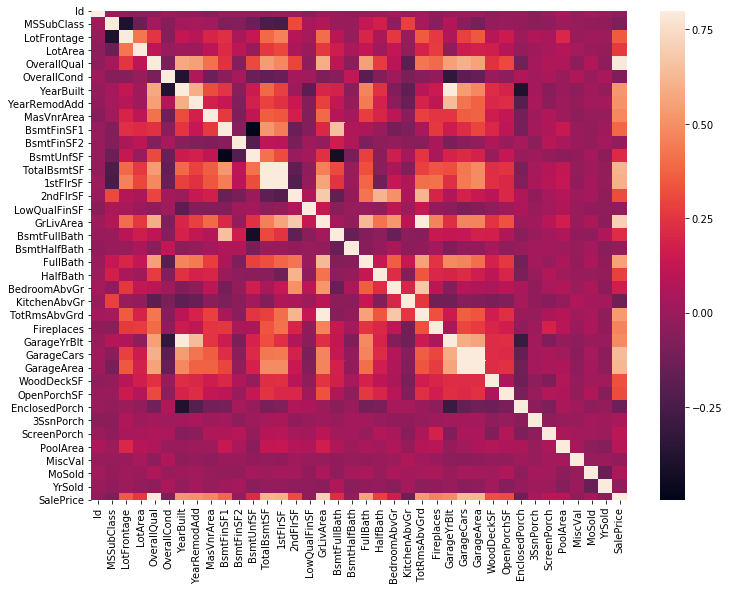

In [6]:
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8)

### 強い相関が見られる
- 1stFlrSFとTotalBsmtSF
- GarageAreaとGarageCars
- TotRmsAbvGrdとGrLivArea
- GarageYrBltとYearBuilt
- SalePriceとOverallQual

In [7]:
np.corrcoef(corrmat)

array([[ 1.        ,  0.01959078, -0.13635849, ...,  0.00481872,
        -0.01669389, -0.19246576],
       [ 0.01959078,  1.        , -0.67572374, ..., -0.03467086,
        -0.03379787, -0.26353768],
       [-0.13635849, -0.67572374,  1.        , ..., -0.04918199,
        -0.13373493,  0.59606324],
       ...,
       [ 0.00481872, -0.03467086, -0.04918199, ...,  1.        ,
        -0.32092611, -0.02208065],
       [-0.01669389, -0.03379787, -0.13373493, ..., -0.32092611,
         1.        , -0.20781087],
       [-0.19246576, -0.26353768,  0.59606324, ..., -0.02208065,
        -0.20781087,  1.        ]])

In [8]:
k = 10
cols = corrmat.nlargest(k, ['SalePrice']).index

In [9]:
train[cols]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999
1456,210000,6,2073,2,500,1542,2073,2,7,1978
1457,266500,7,2340,1,252,1152,1188,2,9,1941
1458,142125,5,1078,1,240,1078,1078,1,5,1950


In [10]:
train[cols].values

array([[208500,      7,   1710, ...,      2,      8,   2003],
       [181500,      6,   1262, ...,      2,      6,   1976],
       [223500,      7,   1786, ...,      2,      6,   2001],
       ...,
       [266500,      7,   2340, ...,      2,      9,   1941],
       [142125,      5,   1078, ...,      1,      5,   1950],
       [147500,      5,   1256, ...,      1,      6,   1965]])

In [11]:
train[cols].values.T

array([[208500, 181500, 223500, ..., 266500, 142125, 147500],
       [     7,      6,      7, ...,      7,      5,      5],
       [  1710,   1262,   1786, ...,   2340,   1078,   1256],
       ...,
       [     2,      2,      2, ...,      2,      1,      1],
       [     8,      6,      6, ...,      9,      5,      6],
       [  2003,   1976,   2001, ...,   1941,   1950,   1965]])

In [12]:
np.corrcoef(train[cols].values.T)

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

### SalePriceと相関が強い説明変数を調べる

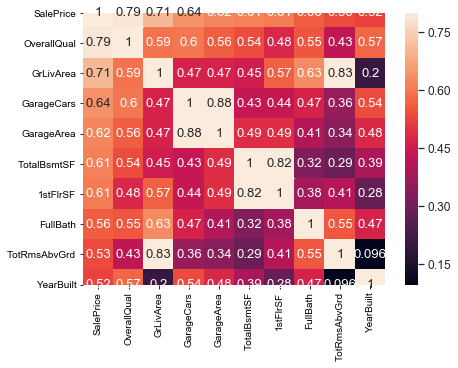

In [13]:
k = 10
cols = corrmat.nlargest(k, ['SalePrice']).index
Sale_corr = np.corrcoef(train[cols].values.T)
fig, ax = plt.subplots(figsize=(7,5))
sns.set(font_scale=1.1)
sns.heatmap(data=Sale_corr, vmax=0.8, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- GarageCarsとGarageAreaは非常に似たデータであることが分かるので、GarageAreaは不要
- 同様に1stFlrSFとTotRmsAbvGrdも不要

In [14]:
train.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'], axis=1, inplace=True)

In [15]:
test.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'], axis=1, inplace=True)

### SalePriceと相関が強い変数
- OverallQual
- GrLivArea
- GarageCars
- TotalBsmtSF
- FullBath
- YearBuilt

### SalePriceと相関が強い説明変数との関係を可視化してみる

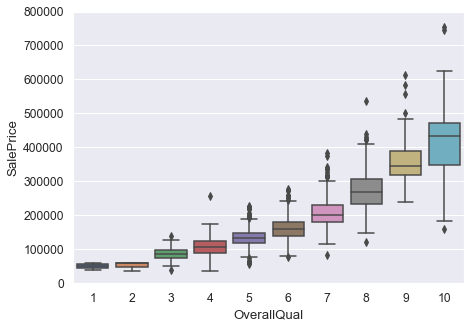

In [16]:
var = 'OverallQual'
fig, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y='SalePrice', data=train)
fig.axis(ymin=0, ymax=800000);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


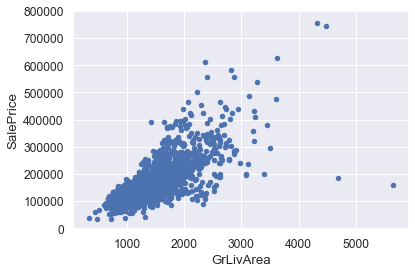

In [17]:
var = 'GrLivArea'
train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- 'GrLivArea'が4000を超えているにも関わらず、'SalePrice'が安い点が2つある。農業エリアと考えられるが外れ値とみなして問題ないだろう。

In [18]:
pd.set_option('display.max_columns', 100)

In [19]:
train.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,950,0,5642,2,0,2,1,3,1,Ex,Typ,3,Gd,Attchd,2008.0,Fin,2,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,1538,0,4676,1,0,3,1,3,1,Ex,Typ,1,Gd,BuiltIn,2007.0,Fin,3,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [20]:
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

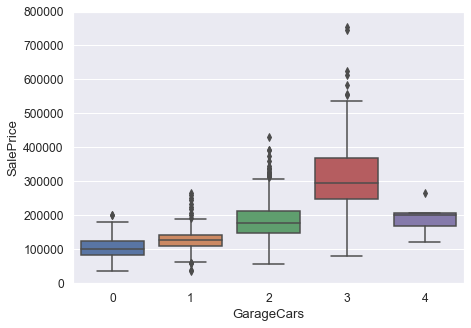

In [21]:
var = 'GarageCars'
fig,ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y='SalePrice', data=train)
fig.axis(ymin=0, ymax=800000);

- 4は母体数が少ないため、正確とは言えない

In [22]:
train.groupby('GarageCars')['Id'].count().to_frame()

,Id
GarageCars,
0,81
1,369
2,823
3,180
4,5


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


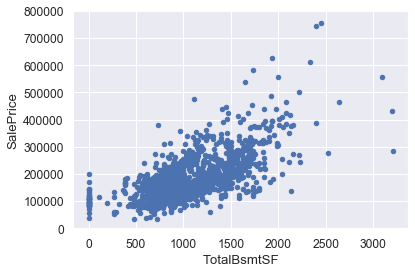

In [23]:
var = 'TotalBsmtSF'
train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- 線形の関係が見られる。
- TotalBsmtSfは0を多く含む。

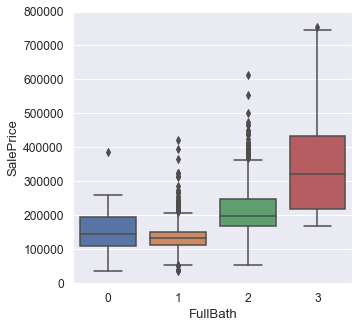

In [24]:
var = 'FullBath'
fig,ax = plt.subplots(figsize=(5,5))
fig = sns.boxplot(x=var, y='SalePrice', data=train)
fig.axis(ymin=0, ymax=800000);

- FullBathの個数が0,1個はほとんど変わらないが、2,3個では明らかにSalePriceが高くなっていることが分かる。

In [25]:
train.groupby('FullBath')['Id'].count().to_frame()

,Id
FullBath,
0,9
1,650
2,767
3,32


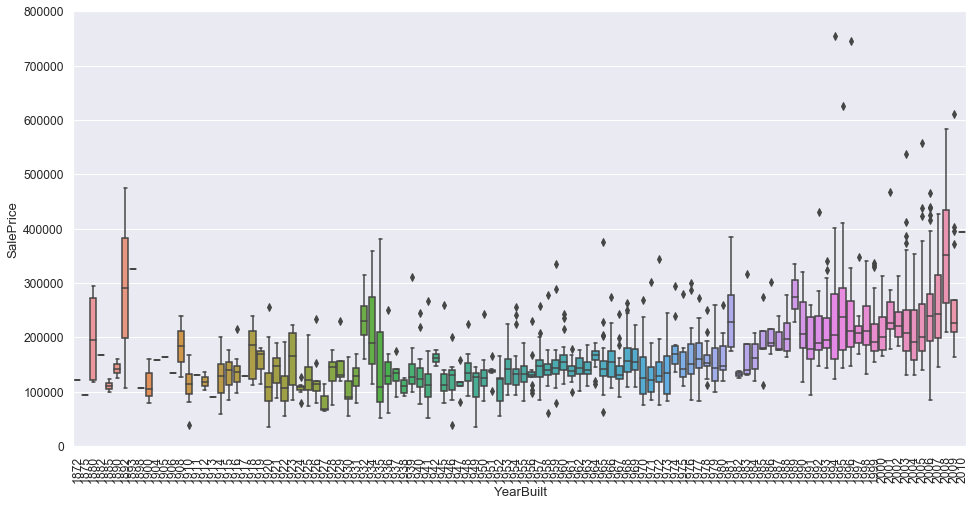

In [26]:
var = 'YearBuilt'
fig,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='SalePrice', data=train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## 欠損値の確認と処理

In [27]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageCond,81,0.055556
GarageType,81,0.055556
GarageYrBlt,81,0.055556
GarageFinish,81,0.055556


- 'GarageX'という変数はすべて81個の欠損値を持ち、この81という数字は'GarageCars'が0台の時の数字と一致する。これらの変数の情報は'GarageCars'に含まれる(相関が強い)と考えられ、この'GarageX'という変数はすべて消していいだろう。
- 'BsmtX'という変数も、37個または38個の欠損値を持ち、この37という数字は'TotalBsmtSF'が0の時の数字と一致する。これらの変数の情報は'TotalBsmtSF'に含まれる(相関が強い)と考えられ、この'BsmtX'という変数もすべて消していいだろう。
- 'PoolQC', 'MiscFeature', 'Alley'は欠損値が非常に多く、データの傾向が正しく読み取れない。さらに’SalePrice’とは全然関係ないと考えられるので消して良いだろう。

In [28]:
train.groupby('GarageCars')['Id'].count().to_frame()

,Id
GarageCars,
0,81
1,369
2,823
3,180
4,5


In [29]:
train.groupby('TotalBsmtSF')['Id'].count().to_frame().head(5)

,Id
TotalBsmtSF,
0,37
105,1
190,1
264,3
270,1


### 不要と判断した欠損値を全て消す

In [30]:
del_col1=['GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual',
          'BsmtFinType2','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1',
          'PoolQC', 'MiscFeature', 'Alley']
train.drop(del_col1, axis=1, inplace=True)
test.drop(del_col1, axis=1, inplace=True)

### 欠損値を含む列が19列あり、そのうち13列を削除した。
#### 以下では残り6列について調べていく。

#### ①'Fence'について調べる

In [31]:
train['SalePrice'].median()

163000.0

In [32]:
train.groupby('Fence')['SalePrice'].mean()

Fence
GdPrv    178927.457627
GdWo     140379.314815
MnPrv    148751.089172
MnWw     134286.363636
Name: SalePrice, dtype: float64

In [33]:
train.groupby('Fence')['SalePrice'].count()

Fence
GdPrv     59
GdWo      54
MnPrv    157
MnWw      11
Name: SalePrice, dtype: int64

In [34]:
train['Fence'] = train['Fence'].fillna('Nan')
test['Fence'] = test['Fence'].fillna('Nan')

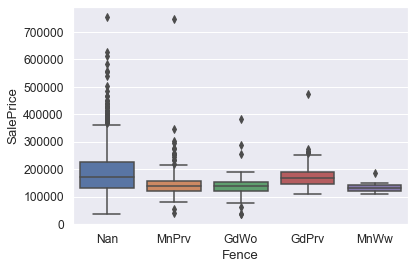

In [35]:
sns.boxplot(data=train, x='Fence', y='SalePrice')
plt.show()

- ’Gdprv’は他のカテゴリに比べて少しだけ’SalePrice’が高い。
- 'Nan'は'Fence'がないということを示す。

#### ②’FireplaceQu’について調べる

In [36]:
train['SalePrice'].mean()

180932.91906721535

In [37]:
train['SalePrice'].median()

163000.0

In [38]:
train.groupby('FireplaceQu')['SalePrice'].mean()

FireplaceQu
Ex    337712.500000
Fa    167298.484848
Gd    226637.005291
Po    129764.150000
TA    205723.488818
Name: SalePrice, dtype: float64

In [39]:
train.groupby('FireplaceQu')['SalePrice'].count()

FireplaceQu
Ex     24
Fa     33
Gd    378
Po     20
TA    313
Name: SalePrice, dtype: int64

In [40]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('Nan')

In [41]:
test['FireplaceQu'] = test['FireplaceQu'].fillna('Nan')

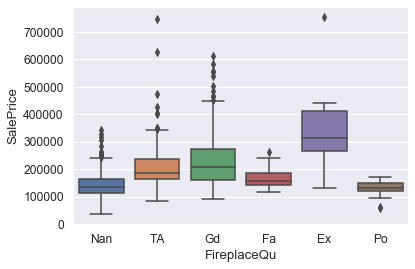

In [42]:
sns.boxplot(data=train, x='FireplaceQu', y='SalePrice')
plt.show()

- 'FireplaceQU'(暖炉の質)と'SalePrice'には関係があるといえる。

#### ③LotFrontageについて調べる

In [43]:
pd.set_option('display.max_columns', 50)

In [44]:
train.groupby('LotFrontage')['SalePrice'].mean()

LotFrontage
21.0      94278.260870
24.0     145226.315789
30.0     160480.833333
32.0     186700.000000
33.0     113000.000000
             ...      
160.0    745000.000000
168.0    274725.000000
174.0    319000.000000
182.0    259000.000000
313.0    242000.000000
Name: SalePrice, Length: 110, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


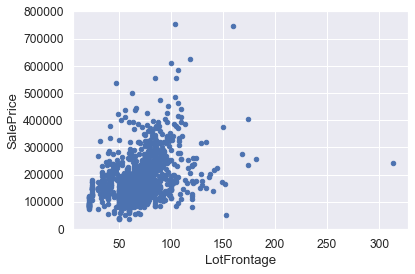

In [45]:
var = 'LotFrontage'
train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

- 一点だけLotFrontageの値が大きい点が見られる。

In [46]:
print(max(train['LotFrontage']))

313.0


In [47]:
train[train['LotFrontage']==313]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,...,1,0,2,0,4,1,Gd,Typ,1,Gd,2,Y,0,0,0,0,0,0,Nan,0,11,2008,WD,Normal,242000


In [48]:
test.sort_values('LotFrontage', ascending=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1139,2600,20,RL,200.0,43500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,...,2034,0.0,0.0,1,0,2,1,TA,Min1,0,Nan,4.0,N,483,266,0,0,0,561,GdPrv,0,6,2007,WD,Normal
804,2265,190,RL,195.0,41600,Pave,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,Norm,Norm,2fmCon,1Story,5,5,1969,1990,Gable,CompShg,HdBoard,HdBoard,None,...,1424,1.0,0.0,1,1,3,1,TA,Mod,0,Nan,3.0,N,144,0,0,0,0,0,Nan,0,11,2007,WD,Normal
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,...,1224,1.0,0.0,1,0,4,1,TA,Typ,1,TA,2.0,Y,474,0,0,0,0,0,Nan,0,9,2006,WD,Abnorml
799,2260,20,RL,160.0,18160,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,6,1964,1964,Gable,CompShg,HdBoard,HdBoard,BrkCmn,...,1128,1.0,0.0,1,0,3,1,TA,Typ,1,TA,2.0,P,0,108,246,0,0,0,MnPrv,0,3,2007,WD,Alloca
1053,2514,20,RL,155.0,20064,Pave,IR1,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,8,6,1976,1976,Shed,WdShngl,Wd Sdng,Wd Sdng,None,...,1743,2.0,0.0,0,1,0,1,Gd,Typ,2,Fa,2.0,Y,646,0,0,0,0,0,Nan,0,5,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,2848,20,RL,NaN,11088,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,Stucco,Stucco,None,...,1358,1.0,0.0,1,1,1,1,Gd,Typ,1,TA,2.0,Y,68,166,0,0,0,0,Nan,0,6,2006,WD,Normal
1390,2851,60,RL,NaN,21533,Pave,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Feedr,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,None,...,2049,0.0,0.0,2,1,4,1,Gd,Typ,1,TA,2.0,Y,120,48,0,0,0,0,Nan,0,8,2006,WD,Normal
1440,2901,20,RL,NaN,50102,Pave,IR1,Low,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,6,5,1958,1958,Gable,Tar&Grv,Plywood,Plywood,None,...,1650,1.0,0.0,1,0,2,1,TA,Typ,2,Gd,2.0,Y,0,0,0,0,138,0,Nan,0,3,2006,WD,Alloca
1441,2902,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,...,1403,1.0,0.0,2,0,2,1,Gd,Typ,0,Nan,2.0,Y,0,173,0,0,0,0,Nan,0,10,2006,WD,Normal


- テストデータのLotFrontage列を降順にソートした

In [49]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

- 'Neighborhood'の種類ごとに’LotFrontage’の中央値で欠損値を補完した

#### ④MasVurArea（ベニヤ版の面積）について調べる

In [50]:
train.groupby('MasVnrArea')['SalePrice'].mean()

MasVnrArea
0.0       156557.946574
1.0       152250.000000
11.0      160200.000000
14.0      191000.000000
16.0      190233.571429
              ...      
1115.0    244000.000000
1129.0    176000.000000
1170.0    755000.000000
1378.0    625000.000000
1600.0    239000.000000
Name: SalePrice, Length: 325, dtype: float64

In [51]:
train.groupby('MasVnrArea')['SalePrice'].count()

MasVnrArea
0.0       861
1.0         2
11.0        1
14.0        1
16.0        7
         ... 
1115.0      1
1129.0      1
1170.0      1
1378.0      1
1600.0      1
Name: SalePrice, Length: 325, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


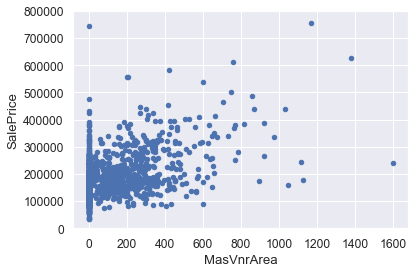

In [52]:
var = 'MasVnrArea'
train.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [53]:
train['MasVnrArea'].describe()

count    1450.000000
mean      102.753793
std       179.442156
min         0.000000
25%         0.000000
50%         0.000000
75%       164.750000
max      1600.000000
Name: MasVnrArea, dtype: float64

- 中央値が0なので、欠損値を0で補完する。

In [54]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [55]:
correlation_1 = np.corrcoef(train['MasVnrArea'], train['OverallQual'])
correlation_2 = np.corrcoef(train['MasVnrArea'], train['YearBuilt'])
print(correlation_1[0,1])
print(correlation_2[0,1])

0.3987845232522769
0.3087215642447482


- 既存の説明変数との相関係数はやや高いものの、このデータを消す根拠には至らないと判断した。

#### ⑤MasVnrType（ベニヤ板のタイプ）について調べる

In [56]:
train.groupby('MasVnrType')['SalePrice'].count()

MasVnrType
BrkCmn      15
BrkFace    445
None       864
Stone      126
Name: SalePrice, dtype: int64

In [57]:
train['MasVnrType']=train['MasVnrType'].fillna('Nan')
test['MasVnrType']=test['MasVnrType'].fillna('Nan')

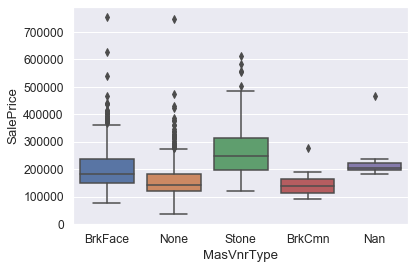

In [58]:
sns.boxplot(x='MasVnrType', y='SalePrice', data=train)
plt.show()

- None, BrkCmnはSalePriceがやや安く、Stoneは少し高いという傾向が見られる

#### ⑥Electricalについて調べる

In [59]:
train.groupby('Electrical')['SalePrice'].mean()

Electrical
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
SBrkr    186846.810060
Name: SalePrice, dtype: float64

In [60]:
train.groupby('Electrical')['SalePrice'].count()

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1332
Name: SalePrice, dtype: int64

#### Electrical列で欠損値を含む行を削除する

In [61]:
train.drop(train[train['Electrical'].isnull()].index, inplace=True)

#### 欠損値の総数を再び見てみる

In [62]:
train.isnull().sum().sort_values(ascending=False).to_frame()

,0
SalePrice,0
BsmtUnfSF,0
BsmtFinSF1,0
Foundation,0
ExterCond,0
...,...
2ndFlrSF,0
Electrical,0
CentralAir,0
HeatingQC,0


In [63]:
test.isnull().sum().sort_values(ascending=False).to_frame()

,0
MSZoning,4
BsmtHalfBath,2
BsmtFullBath,2
Functional,2
Utilities,2
...,...
Electrical,0
CentralAir,0
HeatingQC,0
Heating,0


In [64]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSZoning,4,0.002742
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
Functional,2,0.001371
Utilities,2,0.001371
Exterior2nd,1,0.000685
KitchenQual,1,0.000685
GarageCars,1,0.000685
BsmtUnfSF,1,0.000685
TotalBsmtSF,1,0.000685


In [65]:
train.groupby('MSZoning')['Id'].count()

MSZoning
C (all)      10
FV           65
RH           16
RL         1148
RM          218
Name: Id, dtype: int64

In [66]:
test['MSZoning'] = test['MSZoning'].fillna('RL')

- 一番多いRLで補完

In [67]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test[col] = test[col].fillna(0)

- 欠損値はおそらく地下がないと考えられ、0で補完する

In [68]:
train.groupby('Utilities')['Id'].count()

Utilities
AllPub    1456
NoSeWa       1
Name: Id, dtype: int64

- これは明らかに不要な説明変数と言える

In [69]:
train.drop(['Utilities'], axis=1, inplace=True)
test.drop(['Utilities'], axis=1, inplace=True)

In [70]:
train.groupby('Functional')['Id'].count()

Functional
Maj1      14
Maj2       5
Min1      31
Min2      34
Mod       15
Sev        1
Typ     1357
Name: Id, dtype: int64

In [71]:
test['Functional'] = test['Functional'].fillna('Typ')

- 一番多いTypで補完

In [72]:
train.groupby('KitchenQual')['Id'].count()

KitchenQual
Ex     98
Fa     39
Gd    585
TA    735
Name: Id, dtype: int64

In [73]:
test['KitchenQual'] = test['KitchenQual'].fillna('TA')

- 一番多いTAで補完

In [74]:
train.groupby('GarageCars')['Id'].count()

GarageCars
0     81
1    369
2    822
3    180
4      5
Name: Id, dtype: int64

In [75]:
test['GarageCars'] = test['GarageCars'].fillna(0)

- 欠損値は車庫がなかったと考えられるので0で補完

In [76]:
train.groupby('Exterior2nd')['Id'].count()

Exterior2nd
AsbShng     20
AsphShn      3
Brk Cmn      7
BrkFace     25
CBlock       1
CmentBd     59
HdBoard    207
ImStucc     10
MetalSd    214
Other        1
Plywood    142
Stone        5
Stucco      25
VinylSd    503
Wd Sdng    197
Wd Shng     38
Name: Id, dtype: int64

In [77]:
test['Exterior1st'] = test['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

- 一番多いカテゴリで補完

In [78]:
train.groupby('SaleType')['Id'].count()

SaleType
COD        43
CWD         4
Con         2
ConLD       9
ConLI       5
ConLw       5
New       120
Oth         3
WD       1266
Name: Id, dtype: int64

In [79]:
test['SaleType'] = test['SaleType'].fillna('WD')

- 一番多いWDで補完

In [80]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
SaleCondition,0,0.0
OverallQual,0,0.0
BsmtFinSF1,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
MasVnrArea,0,0.0
MasVnrType,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0


### ヒストグラムと正規確率プロットで正規性をみる

In [81]:
from scipy.stats import norm
from scipy import stats

#### SalePriceの正規性の確認

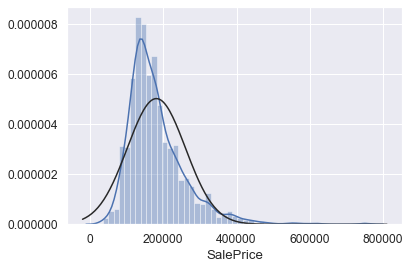

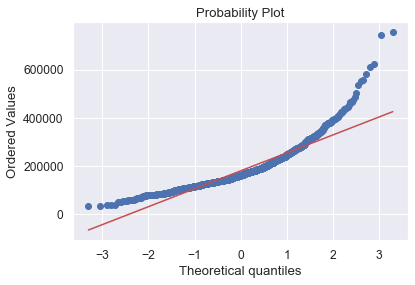

In [82]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

- 正規分布にあまり従っていない

#### 対数変換を用いて正規分布に近づける

In [83]:
train['SalePrice'] = np.log(train['SalePrice'])

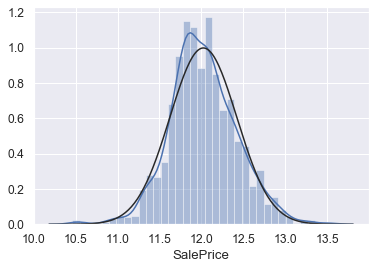

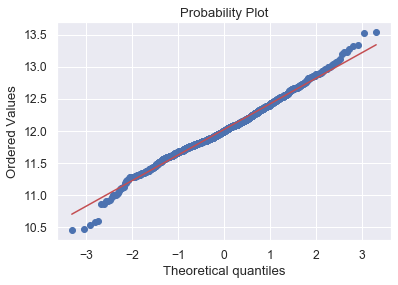

In [84]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

- 正規分布のグラフにかなり従うようになった

#### GrLibAreaの正規性の確認

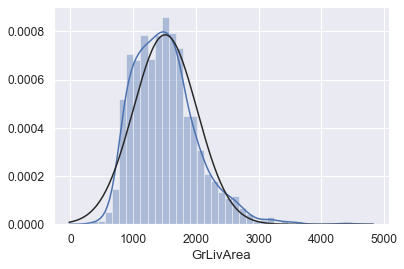

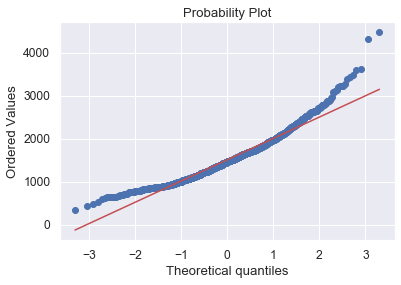

In [85]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

- 正規確率プロットが直線を描いていないので、少し歪みがあることが分かる

#### 対数変換を用いて正規分布に近づける

In [86]:
train['GrLivArea'] = np.log(train['GrLivArea'])

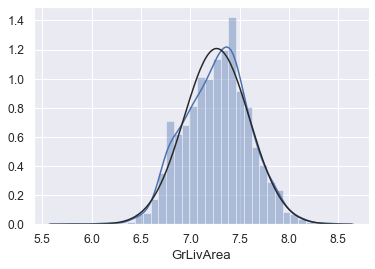

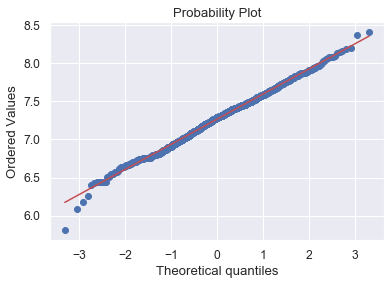

In [87]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

- 正規分布のグラフに近づいた

#### TotalBsmtSFの正規性の確認

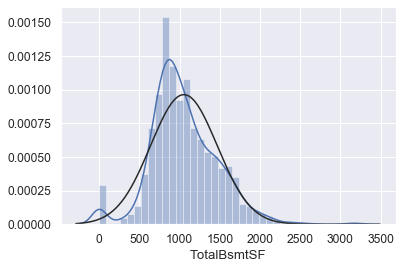

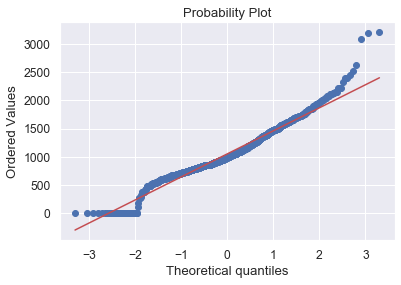

In [88]:
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

- Theoretical quantiles = -2, 2〜3あたりで歪みがある

#### TotalBsmtSFは0を含むので、0より大きいものだけ対数変換を試みる

In [89]:
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [90]:
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

/Users/kobayashihiroki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


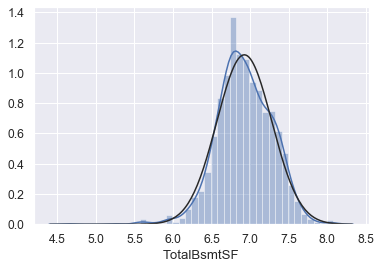

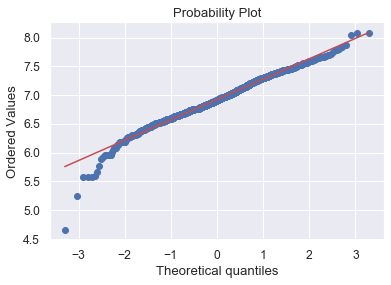

In [91]:
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

- 正規分布のグラフに近づいた

In [92]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [93]:
train.to_csv('train_data.csv')
test.to_csv('test_data.csv')